In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import nbimporter

In [2]:
df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1,"No":0})
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


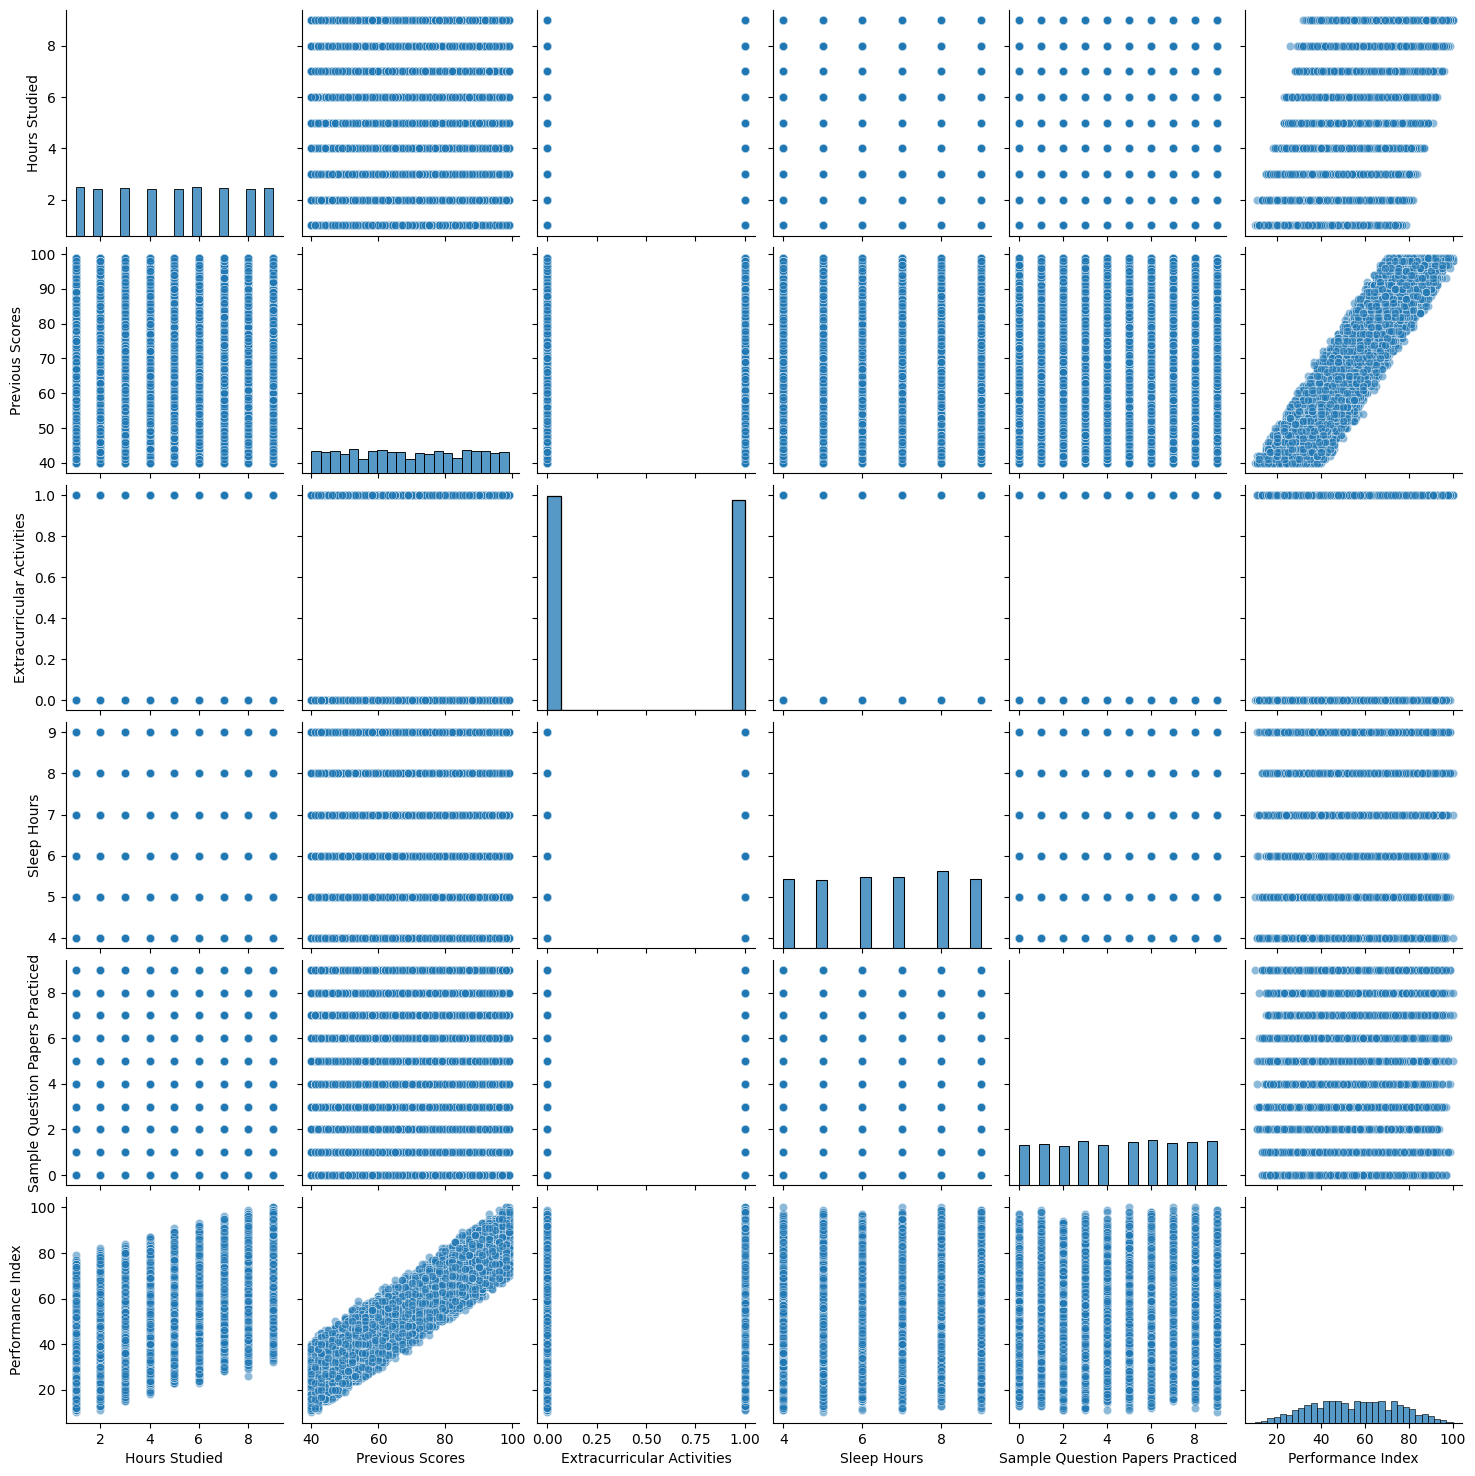

In [6]:
sns.pairplot(df, kind='scatter', plot_kws={"alpha":0.5})

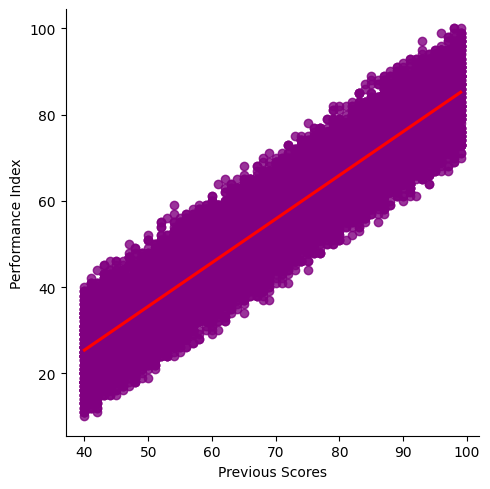

In [7]:
sns.lmplot(df,x="Previous Scores",y="Performance Index",scatter_kws={"color": "purple"},line_kws={"color": "red"})

In [8]:
import nbimporter
from compute_prediction_n_features import compute_prediction_n_features
from compute_gradient_n_features import compute_gradient_n_features_vec
from compute_cost_n_features import compute_cost_n_features
from compute_gradient_descent_n_features import compute_gradient_descent_n_features

# dir(md) print list of functions or vars in a file import 


In [13]:

X ,y= df[["Hours Studied","Previous Scores","Extracurricular Activities","Sleep Hours","Sample Question Papers Practiced"]],df["Performance Index"]
X_train,y_train = X.to_numpy(), y.to_numpy()
w_in = np.zeros(X_train.shape[1])
b_in = 0

In [12]:
w_out, b_out, j_hist, w_hist = compute_gradient_descent_n_features(X_train,y_train,w_in,b_in,1e-5,10000000,compute_cost_n_features,compute_gradient_n_features_vec)

i= 0 Cost = 1539.701502952846, w = [0.00294322 0.04140041 0.00027561 0.00362218 0.00255495], b = 0
i= 1000000 Cost = 10.971052356207414, w = [ 2.34630851  0.86384608 -0.80880344 -1.05809699 -0.16014145], b = 0
i= 2000000 Cost = 7.414691363407584, w = [ 2.46127682  0.89891609 -0.56015117 -0.70956668 -0.07969873], b = 0
i= 3000000 Cost = 5.280637828339853, w = [ 2.5495603   0.92585281 -0.30143089 -0.44137931 -0.01804648], b = 0
i= 4000000 Cost = 3.999587802362659, w = [ 2.61790045  0.94670502 -0.09592832 -0.23373308  0.02966928], b = 0
i= 5000000 Cost = 3.2305840844481817, w = [ 2.67084475  0.96285962  0.06367799 -0.07286269  0.06663479], b = 0
i= 6000000 Cost = 2.7689575070436243, w = [2.71186484 0.97537586 0.18736806 0.05177643 0.09527482], b = 0
i= 7000000 Cost = 2.491846887062118, w = [2.74364656 0.98507324 0.28320352 0.14834489 0.11746465], b = 0
i= 8000000 Cost = 2.32549967165979, w = [2.76827056 0.99258663 0.35745557 0.22316467 0.134657  ], b = 0
i= 9000000 Cost = 2.22564281278579

In [14]:
w_out

array([2.80213043, 1.00291811, 0.45955781, 0.32604758, 0.15829779])

In [18]:
predictions = compute_prediction_n_features(X_train,w_out,b_out)


In [19]:
predictions

array([91.02711424, 63.63961719, 45.19537801, ..., 72.48543764,
       93.81514593, 65.16855609], shape=(10000,))

In [17]:
y_train

array([91., 65., 45., ..., 74., 95., 64.], shape=(10000,))

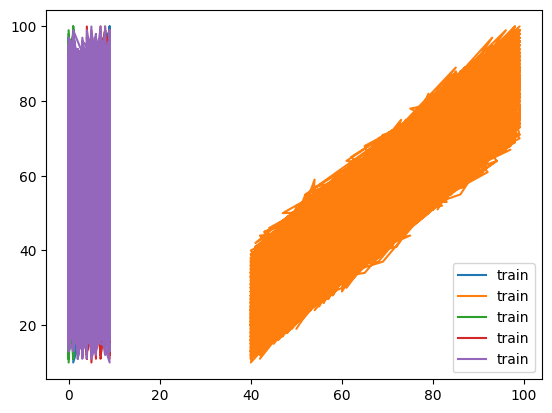

In [22]:
plt.plot(X_train, y_train, label="train")
# plt.plot(X_train, predictions, label="test")
plt.legend()


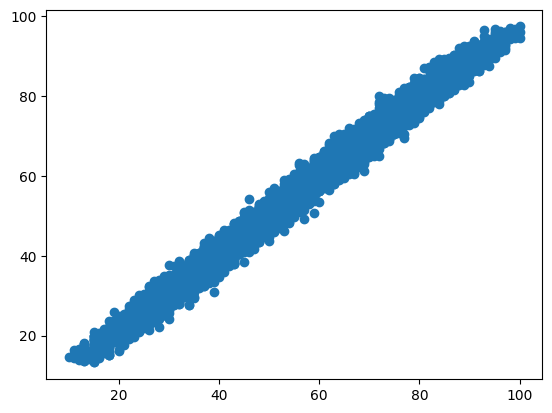

In [23]:
plt.scatter(y_train,predictions)

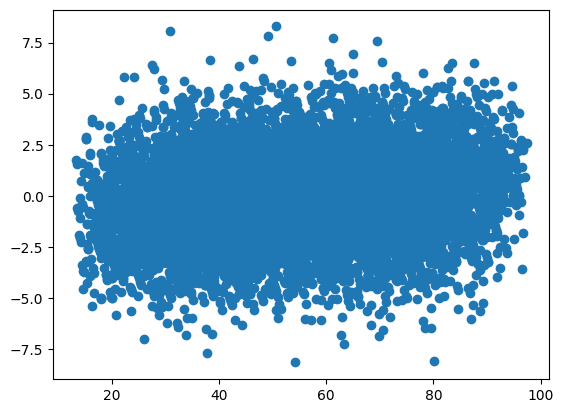

In [26]:
residuals = y_train - predictions
plt.scatter(predictions,residuals)